In [264]:
import numpy as np
import scipy.optimize
import matplotlib.pyplot as plt

**2. Etude numérique du problème de Markowitz**


5. Il s'agit d'un problème d'optimisation quadratique sous contraintes linéaires.

In [265]:
#Constantes
p_1 = 0.05
p_2 = 0.15
p_3 = 0.3
sigm_1 = 0.1
sigm_2 = 0.3
sigm_3 = 0.8
ro = 0.1
r = 0.1
sigm = np.array([[sigm_1**2,ro*sigm_1*sigm_2,0],[ro*sigm_1*sigm_2,sigm_2**2,0],[0,0,sigm_3**2]])

6. Résolution du problème pour ro = 0.1

In [266]:
x_1_b = np.arange(0,1,1e-3)
x_2_b = np.arange(0,1,1e-3)
x_1_l,x_2_l = [],[]
for i in range(len(x_1_b)):
    for j in range(len(x_2_b)):
        if x_1_b[i] + x_2_b[j] == 1 :
            x_1_l.append(x_1_b[i])
            x_2_l.append(x_2_b[j])
x_1 = np.array(x_1_l)
x_2 = np.array(x_2_l)
x_3 = np.zeros(np.shape(x_1))
x = np.array([list(k) for k in zip(x_1, x_2, x_3)])

In [267]:
def f(z,ro = ro, r = r, sigm_3 = sigm_3):
    sigm = np.array([[sigm_1**2,ro*sigm_1*sigm_2,0],[ro*sigm_1*sigm_2,sigm_2**2,0],[0,0,sigm_3**2]])
    return np.matmul(z.T,np.matmul(sigm,z))

def con_1(z):
    return np.matmul(np.array([1,1,1]).T,z)-1

def con_2(z, ro = ro, r = r, sigm_3 = sigm_3):
    sigm = np.array([[sigm_1**2,ro*sigm_1*sigm_2,0],[ro*sigm_1*sigm_2,sigm_2**2,0],[0,0,sigm_3**2]])
    return np.matmul(np.array([p_1,p_2,p_3]).T,z)-r

def con_3(z,sm = sm):
    return sm-np.matmul(np.array([1,1,1]).T,z)


cons = [{'type':'eq', 'fun': con_1},
        {'type':'eq', 'fun': con_2}]

In [268]:
print(scipy.optimize.minimize(f,np.array([0.,0.,0.]), constraints = cons))

     fun: 0.017067775457853505
     jac: array([0.01432848, 0.05394262, 0.11336383])
 message: 'Optimization terminated successfully'
    nfev: 16
     nit: 4
    njev: 4
  status: 0
 success: True
       x: array([0.63284823, 0.27858628, 0.08856549])


In [269]:
ro = 0.5
def f(z,ro = ro, r = r, sigm_3 = sigm_3):
    sigm = np.array([[sigm_1**2,ro*sigm_1*sigm_2,0],[ro*sigm_1*sigm_2,sigm_2**2,0],[0,0,sigm_3**2]])
    return np.matmul(z.T,np.matmul(sigm,z))

def con_1(z):
    return np.matmul(np.array([1,1,1]).T,z)-1

def con_2(z, ro = ro, r = r, sigm_3 = sigm_3):
    sigm = np.array([[sigm_1**2,ro*sigm_1*sigm_2,0],[ro*sigm_1*sigm_2,sigm_2**2,0],[0,0,sigm_3**2]])
    return np.matmul(np.array([p_1,p_2,p_3]).T,z)-r

In [270]:
print(scipy.optimize.minimize(f,np.array([0.,0.,0.]), constraints = cons))

     fun: 0.021123595490494095
     jac: array([0.02044944, 0.06404495, 0.12943821])
 message: 'Optimization terminated successfully'
    nfev: 16
     nit: 4
    njev: 4
  status: 0
 success: True
       x: array([0.65168539, 0.24719102, 0.10112359])


In [271]:
ro = -0.5
def f(z,ro = ro, r = r, sigm_3 = sigm_3):
    sigm = np.array([[sigm_1**2,ro*sigm_1*sigm_2,0],[ro*sigm_1*sigm_2,sigm_2**2,0],[0,0,sigm_3**2]])
    return np.matmul(z.T,np.matmul(sigm,z))

def con_1(z):
    return np.matmul(np.array([1,1,1]).T,z)-1

def con_2(z, ro = ro, r = r, sigm_3 = sigm_3):
    sigm = np.array([[sigm_1**2,ro*sigm_1*sigm_2,0],[ro*sigm_1*sigm_2,sigm_2**2,0],[0,0,sigm_3**2]])
    return np.matmul(np.array([p_1,p_2,p_3]).T,z)-r

In [272]:
print(scipy.optimize.minimize(f,np.array([0.,0.,0.]), constraints = cons))

     fun: 0.010392523371867905
     jac: array([0.00265421, 0.03891589, 0.09330842])
 message: 'Optimization terminated successfully'
    nfev: 16
     nit: 4
    njev: 4
  status: 0
 success: True
       x: array([0.60934579, 0.31775702, 0.07289719])


7. Représentation des valeurs $\sqrt{x^TΣx}$ en focntion de $p^Tx$

In [273]:
ro = 0.1

def f(z,ro = ro, r = r, sigm_3 = sigm_3):
    sigm = np.array([[sigm_1**2,ro*sigm_1*sigm_2,0],[ro*sigm_1*sigm_2,sigm_2**2,0],[0,0,sigm_3**2]])
    return np.matmul(z.T,np.matmul(sigm,z))

def con_1(z):
    return np.matmul(np.array([1,1,1]).T,z)-1

def con_2(z, ro = ro, r = r, sigm_3 = sigm_3):
    sigm = np.array([[sigm_1**2,ro*sigm_1*sigm_2,0],[ro*sigm_1*sigm_2,sigm_2**2,0],[0,0,sigm_3**2]])
    return np.matmul(np.array([p_1,p_2,p_3]).T,z)-r

def con_3(z,sm = sm):
    return sm-np.matmul(np.array([1,1,1]).T,z)

In [274]:
plot = []
plot_1_l,plot_2_l = [],[]
for t in x :
    plot_1_l.append(np.sqrt(f(t)))
    plot_2_l.append(con_2(t))
plot_1 = np.array(plot_1_l) 
plot_2 = np.array(plot_2_l)
print(plot_1.shape)
plot.append(plot_1)
plot.append(plot_2)


plot_1_l,plot_2_l = [],[]
for t in x :
    plot_1_l.append(np.sqrt(f(t, ro = 0.5)))
    plot_2_l.append(con_2(t, ro = 0.5))
plot_1 = np.array(plot_1_l) 
plot_2 = np.array(plot_2_l)
print(plot_1.shape)
plot.append(plot_1)
plot.append(plot_2)


plot_1_l,plot_2_l = [],[]
for t in x :
    plot_1_l.append(np.sqrt(f(t, ro = -0.5)))
    plot_2_l.append(con_2(t, ro = -0.5))
plot_1 = np.array(plot_1_l) 
plot_2 = np.array(plot_2_l)
print(plot_1.shape)
plot.append(plot_1)
plot.append(plot_2)


(999,)
(999,)
(999,)


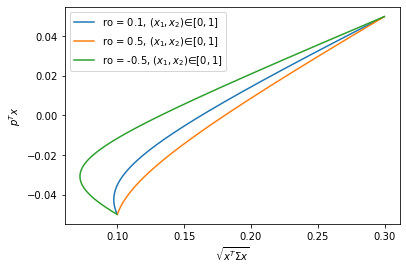

In [275]:
nom_courbe = ["ro = 0.1, $(x_1,x_2)∈[0,1]$","ro = 0.5, $(x_1,x_2)∈[0,1]$","ro = -0.5, $(x_1,x_2)∈[0,1]$"]
for i in range(0,5,2):
    plt.plot(plot[i],plot[i+1],label = nom_courbe[i//2])
plt.xlabel('$\sqrt{x^TΣx}$')
plt.ylabel('$p^Tx$')
plt.legend()

In [276]:
x_1_b = np.linspace(-2,0,999)
x_2_b = 1-x_1_b
x_1 = np.array(x_1_b)
x_2 = np.array(x_2_b)
x_3 = np.zeros(np.shape(x_1))
print(x_1.shape,x_3.shape)
x = np.array([list(k) for k in zip(x_1, x_2, x_3)])
print(x.shape)


plot_1_l,plot_2_l = [],[]
for t in x :
    plot_1_l.append(np.sqrt(f(t)))
    plot_2_l.append(con_2(t))
plot_1 = np.array(plot_1_l) 
plot_2 = np.array(plot_2_l)
print(plot_1.shape)
plot.append(plot_1)
plot.append(plot_2)


plot_1_l,plot_2_l = [],[]
for t in x :
    plot_1_l.append(np.sqrt(f(t, ro = 0.5)))
    plot_2_l.append(con_2(t, ro = 0.5))
plot_1 = np.array(plot_1_l) 
plot_2 = np.array(plot_2_l)
print(plot_1.shape)
plot.append(plot_1)
plot.append(plot_2)


plot_1_l,plot_2_l = [],[]
for t in x :
    plot_1_l.append(np.sqrt(f(t, ro = -0.5)))
    plot_2_l.append(con_2(t, ro = -0.5))
plot_1 = np.array(plot_1_l) 
plot_2 = np.array(plot_2_l)
print(plot_1.shape)
plot.append(plot_1)
plot.append(plot_2)

(999,) (999,)
(999, 3)
(999,)
(999,)
(999,)


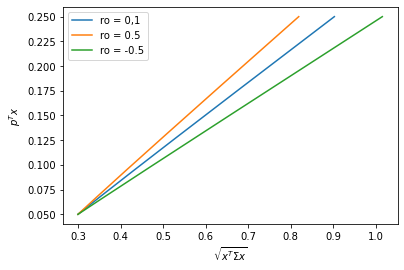

In [277]:
nom_courbe = ["ro = 0,1","ro = 0.5","ro = -0.5"]
for i in range(6,11,2):
    plt.plot(plot[i],plot[i+1],label = nom_courbe[(i-6)//2])
plt.xlabel('$\sqrt{x^TΣx}$')
plt.ylabel('$p^Tx$')
plt.legend()

In [278]:
x_2_b = np.linspace(-2,0,999)
x_1_b = 1-x_2_b
x_1 = np.array(x_1_b)
x_2 = np.array(x_2_b)
x_3 = np.zeros(np.shape(x_1))
print(x_1.shape,x_3.shape)
x = np.array([list(k) for k in zip(x_1, x_2, x_3)])
print(x.shape)


plot_1_l,plot_2_l = [],[]
for t in x :
    plot_1_l.append(np.sqrt(f(t)))
    plot_2_l.append(con_2(t))
plot_1 = np.array(plot_1_l) 
plot_2 = np.array(plot_2_l)
print(plot_1.shape)
plot.append(plot_1)
plot.append(plot_2)


plot_1_l,plot_2_l = [],[]
for t in x :
    plot_1_l.append(np.sqrt(f(t, ro = 0.5)))
    plot_2_l.append(con_2(t, ro = 0.5))
plot_1 = np.array(plot_1_l) 
plot_2 = np.array(plot_2_l)
print(plot_1.shape)
plot.append(plot_1)
plot.append(plot_2)


plot_1_l,plot_2_l = [],[]
for t in x :
    plot_1_l.append(np.sqrt(f(t, ro = -0.5)))
    plot_2_l.append(con_2(t, ro = -0.5))
plot_1 = np.array(plot_1_l) 
plot_2 = np.array(plot_2_l)
print(plot_1.shape)
plot.append(plot_1)
plot.append(plot_2)

(999,) (999,)
(999, 3)
(999,)
(999,)
(999,)


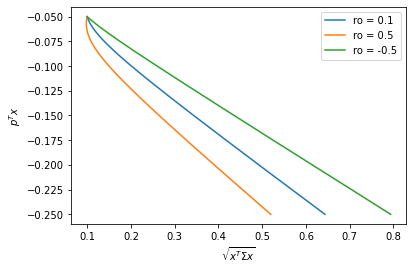

In [279]:
nom_courbe = ["ro = 0.1","ro = 0.5","ro = -0.5"]
for i in range(12,17,2):
    plt.plot(plot[i],plot[i+1],label = nom_courbe[(i-12)//2])
plt.xlabel('$\sqrt{x^TΣx}$')
plt.ylabel('$p^Tx$')
plt.legend()

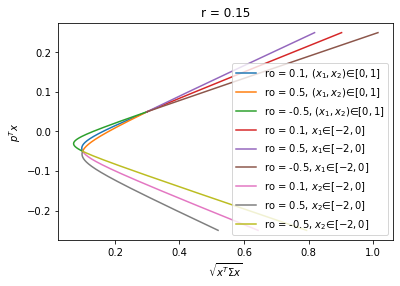

In [280]:
nom_courbe = 3*["ro = 0.1","ro = 0.5","ro = -0.5"]
valeur_x = ["$(x_1,x_2)∈[0,1]$","$(x_1,x_2)∈[0,1]$","$(x_1,x_2)∈[0,1]$","$x_1∈[-2,0]$","$x_1∈[-2,0]$","$x_1∈[-2,0]$","$x_2 ∈ [-2,0]$","$x_2 ∈ [-2,0]$","$x_2 ∈ [-2,0]$"]
for i in range(0,17,2):
    plt.plot(plot[i],plot[i+1],label = nom_courbe[i//2]+", "+valeur_x[i//2])
plt.xlabel('$\sqrt{x^TΣx}$')
plt.ylabel('$p^Tx$')
plt.title("r = 0.15")
plt.legend()

8. Représentation pour r = 0.2

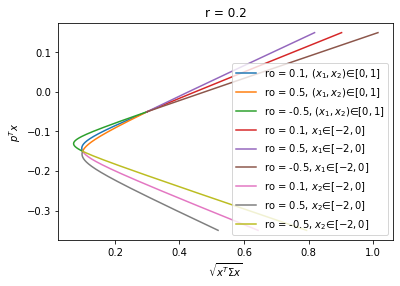

In [281]:
r = 0.2

x_1_b = np.arange(0,1,1e-3)
x_2_b = np.arange(0,1,1e-3)
x_1_l,x_2_l = [],[]
for i in range(len(x_1_b)):
    for j in range(len(x_2_b)):
        if x_1_b[i] + x_2_b[j] == 1 :
            x_1_l.append(x_1_b[i])
            x_2_l.append(x_2_b[j])
x_1 = np.array(x_1_l)
x_2 = np.array(x_2_l)
x_3 = np.zeros(np.shape(x_1))
x = np.array([list(k) for k in zip(x_1, x_2, x_3)])

#-----------#

plot = []
plot_1_l,plot_2_l = [],[]
for t in x :
    plot_1_l.append(np.sqrt(f(t)))
    plot_2_l.append(con_2(t, r=r))
plot_1 = np.array(plot_1_l) 
plot_2 = np.array(plot_2_l)
plot.append(plot_1)
plot.append(plot_2)


plot_1_l,plot_2_l = [],[]
for t in x :
    plot_1_l.append(np.sqrt(f(t, ro = 0.5)))
    plot_2_l.append(con_2(t, ro = 0.5, r = r))
plot_1 = np.array(plot_1_l) 
plot_2 = np.array(plot_2_l)
plot.append(plot_1)
plot.append(plot_2)


plot_1_l,plot_2_l = [],[]
for t in x :
    plot_1_l.append(np.sqrt(f(t, ro = -0.5)))
    plot_2_l.append(con_2(t, ro = -0.5, r = r))
plot_1 = np.array(plot_1_l) 
plot_2 = np.array(plot_2_l)
plot.append(plot_1)
plot.append(plot_2)


#------------#


x_1_b = np.linspace(-2,0,999)
x_2_b = 1-x_1_b
x_1 = np.array(x_1_b)
x_2 = np.array(x_2_b)
x_3 = np.zeros(np.shape(x_1))
x = np.array([list(k) for k in zip(x_1, x_2, x_3)])


plot_1_l,plot_2_l = [],[]
for t in x :
    plot_1_l.append(np.sqrt(f(t)))
    plot_2_l.append(con_2(t, r=r))
plot_1 = np.array(plot_1_l) 
plot_2 = np.array(plot_2_l)
plot.append(plot_1)
plot.append(plot_2)




plot_1_l,plot_2_l = [],[]
for t in x :
    plot_1_l.append(np.sqrt(f(t, ro = 0.5)))
    plot_2_l.append(con_2(t, ro = 0.5, r = r))
plot_1 = np.array(plot_1_l) 
plot_2 = np.array(plot_2_l)
plot.append(plot_1)
plot.append(plot_2)


plot_1_l,plot_2_l = [],[]
for t in x :
    plot_1_l.append(np.sqrt(f(t, ro = -0.5)))
    plot_2_l.append(con_2(t, ro = -0.5, r = r))
plot_1 = np.array(plot_1_l) 
plot_2 = np.array(plot_2_l)
plot.append(plot_1)
plot.append(plot_2)


#--------------#


x_2_b = np.linspace(-2,0,999)
x_1_b = 1-x_2_b
x_1 = np.array(x_1_b)
x_2 = np.array(x_2_b)
x_3 = np.zeros(np.shape(x_1))
x = np.array([list(k) for k in zip(x_1, x_2, x_3)])


plot_1_l,plot_2_l = [],[]
for t in x :
    plot_1_l.append(np.sqrt(f(t)))
    plot_2_l.append(con_2(t, r=r))
plot_1 = np.array(plot_1_l) 
plot_2 = np.array(plot_2_l)
plot.append(plot_1)
plot.append(plot_2)


plot_1_l,plot_2_l = [],[]
for t in x :
    plot_1_l.append(np.sqrt(f(t, ro = 0.5)))
    plot_2_l.append(con_2(t, ro = 0.5, r = r))
plot_1 = np.array(plot_1_l) 
plot_2 = np.array(plot_2_l)
plot.append(plot_1)
plot.append(plot_2)


plot_1_l,plot_2_l = [],[]
for t in x :
    plot_1_l.append(np.sqrt(f(t, ro = -0.5)))
    plot_2_l.append(con_2(t, ro = -0.5, r = r))
plot_1 = np.array(plot_1_l) 
plot_2 = np.array(plot_2_l)
plot.append(plot_1)
plot.append(plot_2)

#------------#

nom_courbe = 3*["ro = 0.1","ro = 0.5","ro = -0.5"]
valeur_x = ["$(x_1,x_2)∈[0,1]$","$(x_1,x_2)∈[0,1]$","$(x_1,x_2)∈[0,1]$","$x_1∈[-2,0]$","$x_1∈[-2,0]$","$x_1∈[-2,0]$","$x_2 ∈ [-2,0]$","$x_2 ∈ [-2,0]$","$x_2 ∈ [-2,0]$"]
for i in range(0,17,2):
    plt.plot(plot[i],plot[i+1],label = nom_courbe[i//2]+", "+valeur_x[i//2])
plt.xlabel('$\sqrt{x^TΣx}$')
plt.ylabel('$p^Tx$')
plt.title("r = 0.2")
plt.legend()

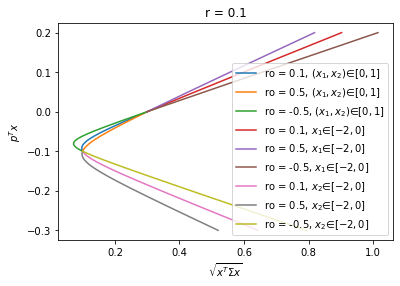

In [282]:
r = 0.15

x_1_b = np.arange(0,1,1e-3)
x_2_b = np.arange(0,1,1e-3)
x_1_l,x_2_l = [],[]
for i in range(len(x_1_b)):
    for j in range(len(x_2_b)):
        if x_1_b[i] + x_2_b[j] == 1 :
            x_1_l.append(x_1_b[i])
            x_2_l.append(x_2_b[j])
x_1 = np.array(x_1_l)
x_2 = np.array(x_2_l)
x_3 = np.zeros(np.shape(x_1))
x = np.array([list(k) for k in zip(x_1, x_2, x_3)])

#-----------#

plot = []
plot_1_l,plot_2_l = [],[]
for t in x :
    plot_1_l.append(np.sqrt(f(t)))
    plot_2_l.append(con_2(t,r=r))
plot_1 = np.array(plot_1_l) 
plot_2 = np.array(plot_2_l)
plot.append(plot_1)
plot.append(plot_2)


plot_1_l,plot_2_l = [],[]
for t in x :
    plot_1_l.append(np.sqrt(f(t, ro = 0.5, r = r)))
    plot_2_l.append(con_2(t, ro = 0.5,r=r))
plot_1 = np.array(plot_1_l) 
plot_2 = np.array(plot_2_l)
plot.append(plot_1)
plot.append(plot_2)


plot_1_l,plot_2_l = [],[]
for t in x :
    plot_1_l.append(np.sqrt(f(t, ro = -0.5)))
    plot_2_l.append(con_2(t, ro = -0.5,r=r))
plot_1 = np.array(plot_1_l) 
plot_2 = np.array(plot_2_l)
plot.append(plot_1)
plot.append(plot_2)


#------------#


x_1_b = np.linspace(-2,0,999)
x_2_b = 1-x_1_b
x_1 = np.array(x_1_b)
x_2 = np.array(x_2_b)
x_3 = np.zeros(np.shape(x_1))
x = np.array([list(k) for k in zip(x_1, x_2, x_3)])


plot_1_l,plot_2_l = [],[]
for t in x :
    plot_1_l.append(np.sqrt(f(t)))
    plot_2_l.append(con_2(t,r=r))
plot_1 = np.array(plot_1_l) 
plot_2 = np.array(plot_2_l)
plot.append(plot_1)
plot.append(plot_2)




plot_1_l,plot_2_l = [],[]
for t in x :
    plot_1_l.append(np.sqrt(f(t, ro = 0.5)))
    plot_2_l.append(con_2(t, ro = 0.5,r=r))
plot_1 = np.array(plot_1_l) 
plot_2 = np.array(plot_2_l)
plot.append(plot_1)
plot.append(plot_2)


plot_1_l,plot_2_l = [],[]
for t in x :
    plot_1_l.append(np.sqrt(f(t, ro = -0.5)))
    plot_2_l.append(con_2(t, ro = -0.5,r=r))
plot_1 = np.array(plot_1_l) 
plot_2 = np.array(plot_2_l)
plot.append(plot_1)
plot.append(plot_2)


#--------------#


x_2_b = np.linspace(-2,0,999)
x_1_b = 1-x_2_b
x_1 = np.array(x_1_b)
x_2 = np.array(x_2_b)
x_3 = np.zeros(np.shape(x_1))
x = np.array([list(k) for k in zip(x_1, x_2, x_3)])


plot_1_l,plot_2_l = [],[]
for t in x :
    plot_1_l.append(np.sqrt(f(t)))
    plot_2_l.append(con_2(t,r=r))
plot_1 = np.array(plot_1_l) 
plot_2 = np.array(plot_2_l)
plot.append(plot_1)
plot.append(plot_2)


plot_1_l,plot_2_l = [],[]
for t in x :
    plot_1_l.append(np.sqrt(f(t, ro = 0.5)))
    plot_2_l.append(con_2(t, ro = 0.5,r=r))
plot_1 = np.array(plot_1_l) 
plot_2 = np.array(plot_2_l)
plot.append(plot_1)
plot.append(plot_2)


plot_1_l,plot_2_l = [],[]
for t in x :
    plot_1_l.append(np.sqrt(f(t, ro = -0.5)))
    plot_2_l.append(con_2(t, ro = -0.5,r=r))
plot_1 = np.array(plot_1_l) 
plot_2 = np.array(plot_2_l)
plot.append(plot_1)
plot.append(plot_2)

#------------#

nom_courbe = 3*["ro = 0.1","ro = 0.5","ro = -0.5"]
valeur_x = ["$(x_1,x_2)∈[0,1]$","$(x_1,x_2)∈[0,1]$","$(x_1,x_2)∈[0,1]$","$x_1∈[-2,0]$","$x_1∈[-2,0]$","$x_1∈[-2,0]$","$x_2 ∈ [-2,0]$","$x_2 ∈ [-2,0]$","$x_2 ∈ [-2,0]$"]
for i in range(0,17,2):
    plt.plot(plot[i],plot[i+1],label = nom_courbe[i//2]+", "+valeur_x[i//2])
plt.xlabel('$\sqrt{x^TΣx}$')
plt.ylabel('$p^Tx$')
plt.title("r = 0.1")
plt.legend()

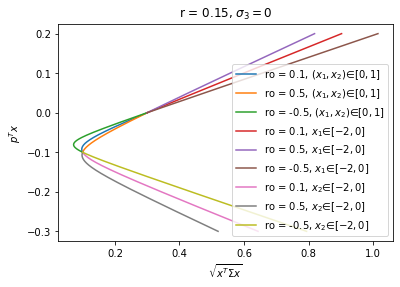

In [283]:
r = 0.15
sigm_3 = 0

x_1_b = np.arange(0,1,1e-3)
x_2_b = np.arange(0,1,1e-3)
x_1_l,x_2_l = [],[]
for i in range(len(x_1_b)):
    for j in range(len(x_2_b)):
        if x_1_b[i] + x_2_b[j] == 1 :
            x_1_l.append(x_1_b[i])
            x_2_l.append(x_2_b[j])
x_1 = np.array(x_1_l)
x_2 = np.array(x_2_l)
x_3 = np.zeros(np.shape(x_1))
x = np.array([list(k) for k in zip(x_1, x_2, x_3)])

#-----------#

plot = []
plot_1_l,plot_2_l = [],[]
for t in x :
    plot_1_l.append(np.sqrt(f(t,sigm_3 = sigm_3)))
    plot_2_l.append(con_2(t,r=r,sigm_3=sigm_3))
plot_1 = np.array(plot_1_l) 
plot_2 = np.array(plot_2_l)
plot.append(plot_1)
plot.append(plot_2)


plot_1_l,plot_2_l = [],[]
for t in x :
    plot_1_l.append(np.sqrt(f(t, ro = 0.5, r = r,sigm_3=sigm_3)))
    plot_2_l.append(con_2(t, ro = 0.5,r=r,sigm_3=sigm_3))
plot_1 = np.array(plot_1_l) 
plot_2 = np.array(plot_2_l)
plot.append(plot_1)
plot.append(plot_2)


plot_1_l,plot_2_l = [],[]
for t in x :
    plot_1_l.append(np.sqrt(f(t, ro = -0.5,sigm_3=sigm_3)))
    plot_2_l.append(con_2(t, ro = -0.5,r=r,sigm_3=sigm_3))
plot_1 = np.array(plot_1_l) 
plot_2 = np.array(plot_2_l)
plot.append(plot_1)
plot.append(plot_2)


#------------#


x_1_b = np.linspace(-2,0,999)
x_2_b = 1-x_1_b
x_1 = np.array(x_1_b)
x_2 = np.array(x_2_b)
x_3 = np.zeros(np.shape(x_1))
x = np.array([list(k) for k in zip(x_1, x_2, x_3)])


plot_1_l,plot_2_l = [],[]
for t in x :
    plot_1_l.append(np.sqrt(f(t,sigm_3 = sigm_3)))
    plot_2_l.append(con_2(t,r=r,sigm_3=sigm_3))
plot_1 = np.array(plot_1_l) 
plot_2 = np.array(plot_2_l)
plot.append(plot_1)
plot.append(plot_2)




plot_1_l,plot_2_l = [],[]
for t in x :
    plot_1_l.append(np.sqrt(f(t, ro = 0.5,sigm_3=sigm_3)))
    plot_2_l.append(con_2(t, ro = 0.5,r=r,sigm_3=sigm_3))
plot_1 = np.array(plot_1_l) 
plot_2 = np.array(plot_2_l)
plot.append(plot_1)
plot.append(plot_2)


plot_1_l,plot_2_l = [],[]
for t in x :
    plot_1_l.append(np.sqrt(f(t, ro = -0.5,sigm_3=sigm_3)))
    plot_2_l.append(con_2(t, ro = -0.5,r=r,sigm_3=sigm_3))
plot_1 = np.array(plot_1_l) 
plot_2 = np.array(plot_2_l)
plot.append(plot_1)
plot.append(plot_2)


#--------------#


x_2_b = np.linspace(-2,0,999)
x_1_b = 1-x_2_b
x_1 = np.array(x_1_b)
x_2 = np.array(x_2_b)
x_3 = np.zeros(np.shape(x_1))
x = np.array([list(k) for k in zip(x_1, x_2, x_3)])


plot_1_l,plot_2_l = [],[]
for t in x :
    plot_1_l.append(np.sqrt(f(t,sigm_3 = sigm_3)))
    plot_2_l.append(con_2(t,r=r,sigm_3=sigm_3))
plot_1 = np.array(plot_1_l) 
plot_2 = np.array(plot_2_l)
plot.append(plot_1)
plot.append(plot_2)


plot_1_l,plot_2_l = [],[]
for t in x :
    plot_1_l.append(np.sqrt(f(t, ro = 0.5,sigm_3=sigm_3)))
    plot_2_l.append(con_2(t, ro = 0.5,r=r,sigm_3=sigm_3))
plot_1 = np.array(plot_1_l) 
plot_2 = np.array(plot_2_l)
plot.append(plot_1)
plot.append(plot_2)


plot_1_l,plot_2_l = [],[]
for t in x :
    plot_1_l.append(np.sqrt(f(t, ro = -0.5,sigm_3=sigm_3)))
    plot_2_l.append(con_2(t, ro = -0.5,r=r,sigm_3=sigm_3))
plot_1 = np.array(plot_1_l) 
plot_2 = np.array(plot_2_l)
plot.append(plot_1)
plot.append(plot_2)

#------------#

nom_courbe = 3*["ro = 0.1","ro = 0.5","ro = -0.5"]
valeur_x = ["$(x_1,x_2)∈[0,1]$","$(x_1,x_2)∈[0,1]$","$(x_1,x_2)∈[0,1]$","$x_1∈[-2,0]$","$x_1∈[-2,0]$","$x_1∈[-2,0]$","$x_2 ∈ [-2,0]$","$x_2 ∈ [-2,0]$","$x_2 ∈ [-2,0]$"]
for i in range(0,17,2):
    plt.plot(plot[i],plot[i+1],label = nom_courbe[i//2]+", "+valeur_x[i//2])
plt.xlabel('$\sqrt{x^TΣx}$')
plt.ylabel('$p^Tx$')
plt.title("r = 0.15, $\sigma_3 = 0$")
plt.legend()

$\sigma_3 = 0$ a pour effet de décaler l'ensemble des courbes vers le bas. On obtient donc un rendement plus faible, et des profits moins importants.

9. problème de la question 4

In [284]:
sm = 0.5
r = 0.4

def f(z,ro = ro, r = r, sigm_3 = sigm_3):
    sigm = np.array([[sigm_1**2,ro*sigm_1*sigm_2,0],[ro*sigm_1*sigm_2,sigm_2**2,0],[0,0,sigm_3**2]])
    return np.matmul(z.T,np.matmul(sigm,z))

def con_1(z):
    return np.matmul(np.array([1,1,1]).T,z)-1

def con_2(z, ro = ro, r = r, sigm_3 = sigm_3):
    sigm = np.array([[sigm_1**2,ro*sigm_1*sigm_2,0],[ro*sigm_1*sigm_2,sigm_2**2,0],[0,0,sigm_3**2]])
    return np.matmul(np.array([p_1,p_2,p_3]).T,z)-r

def con_3(z):
    m = np.array([0.,0.,0.])
    for i in range(3):
        m[i] = max(-z[i],0)
    return m

def con_4(z):
    m = np.array([0.,0.,0.])
    for i in range(3):
        m[i] = max(-z[i],0)
    return m + z

def con_5(z,sm = sm):
    m = np.array([0.,0.,0.])
    for i in range(3):
        m[i] = max(-z[i],0)
    return sm-np.matmul(np.array([1.,1.,1.]).T,m)

cons = [{'type':'eq', 'fun': con_1},
        {'type':'eq', 'fun': con_2}]

cons_2 = [{'type':'eq', 'fun': con_1},
        {'type':'eq', 'fun': con_2},
        {'type':'ineq', 'fun':con_3},
        {'type':'ineq', 'fun':con_4},
        {'type':'ineq', 'fun':con_5}]

print("\noptimisation en limitant les positions courtes : \n")
print(scipy.optimize.minimize(f,np.array([0.,0.,0.]), constraints = cons_2))
print('\n')
print("optimisation normale : \n")
print(scipy.optimize.minimize(f,np.array([0.,0.,0.]), constraints = cons))


optimisation en limitant les positions courtes : 

     fun: 3.0730705304905744e-22
     jac: array([1.45516035e-10, 1.33924809e-09, 0.00000000e+00])
 message: 'Positive directional derivative for linesearch'
    nfev: 58
     nit: 16
    njev: 12
  status: 8
 success: False
       x: array([-1.73418997e-10, -4.53277984e-12,  6.18296537e-10])


optimisation normale : 

     fun: 0.0015840000038102062
     jac: array([-0.00792 , -0.004752,  0.      ])
 message: 'Optimization terminated successfully'
    nfev: 20
     nit: 5
    njev: 5
  status: 0
 success: True
       x: array([-0.392     , -0.01333334,  1.40533334])
